## Интеллектуальный анализ данных – весна 2025
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

* Если в задании есть вопрос на рассуждение, то за отсутствие ответа на него балл за задание будет снижен вполовину.

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать с усеченным датасетом `Palmer Penguins`, содержащим информацию о характеристиках трех видов пингвинов: `Adelie`, `Chinstrap` и `Gentoo`:



*   Species — вид пингвина (целевая переменная).
*   Island — остров, на котором была сделана запись.
*   Clutch Completion — завершенность кладки яиц.
*   Date Egg — закодированная дата откладки яиц (число дней от самой ранней даты в данных).
*   Culmen Length (mm) — длина клюва.
*   Culmen Depth (mm) — глубина клюва.
*   Flipper Length (mm) — длина ласт.
*   Body Mass (g) — масса тела в граммах.
*   Sex — пол особи.
*   Delta 15 N (o/oo) и Delta 13 C (o/oo) — изотопные значения, характеризующие пищевые предпочтения.

Описание полного набора данных и дополнительную информацию о проекте можно найти [здесь](https://allisonhorst.github.io/palmerpenguins/index.html) и [здесь](https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data?resource=download).

![Palmer Penguins](https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png)



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('penguins_data.csv')
data

,Species,Island,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,Chinstrap,Dream,Yes,382,50.9,19.1,196.0,3550.0,MALE,10.02372,-24.86594
1,Chinstrap,Dream,Yes,741,45.2,17.8,198.0,3950.0,FEMALE,8.88942,-24.49433
2,Gentoo,Biscoe,Yes,744,46.5,13.5,210.0,4550.0,FEMALE,7.99530,-25.32829
3,Chinstrap,Dream,Yes,10,45.2,16.6,191.0,3250.0,FEMALE,9.62357,-24.78984
4,Gentoo,Biscoe,Yes,13,48.4,14.4,203.0,4625.0,FEMALE,8.16582,-26.13971
...,...,...,...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,Yes,382,47.6,18.3,195.0,3850.0,FEMALE,8.83502,-24.65859
340,Adelie,Torgersen,Yes,382,39.7,18.4,190.0,3900.0,MALE,9.29808,-25.23453
341,Adelie,Biscoe,Yes,16,38.6,17.2,199.0,3750.0,FEMALE,8.77322,-26.48973
342,Gentoo,Biscoe,Yes,392,46.6,14.2,210.0,4850.0,FEMALE,8.38289,-26.86352


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные признаки? Если да, то закодируйте их самым оптимальным способом. Аргументируйте свой выбор.

In [3]:
data.isna().sum()

Species                 0
Island                  0
Clutch Completion       0
Date Egg                0
Culmen Length (mm)      2
Culmen Depth (mm)       2
Flipper Length (mm)     2
Body Mass (g)           2
Sex                    10
Delta 15 N (o/oo)      14
Delta 13 C (o/oo)      13
dtype: int64

В наборе есть пропущенные значения. Удаляем:

In [4]:
data.dropna(inplace = True)

Посмотрим, действительно ли это были все пропущенные значения:

In [5]:
[data[i].value_counts() for i in data.columns]

[Species
 Adelie       139
 Gentoo       119
 Chinstrap     67
 Name: count, dtype: int64,
 Island
 Biscoe       163
 Dream        119
 Torgersen     43
 Name: count, dtype: int64,
 Clutch Completion
 Yes    291
 No      34
 Name: count, dtype: int64,
 Date Egg
 735    18
 387    15
 13     14
 746    13
 383    12
 390    12
 10     12
 392    12
 9      10
 15     10
 382    10
 16     10
 14     10
 4       9
 750     8
 393     8
 372     8
 734     8
 388     8
 733     8
 394     6
 11      6
 6       6
 8       6
 729     6
 0       6
 753     4
 371     4
 21      4
 18      4
 732     4
 743     4
 379     4
 741     4
 22      4
 385     4
 381     4
 752     4
 736     4
 749     3
 386     2
 391     2
 12      2
 744     2
 17      2
 747     2
 740     2
 389     2
 19      2
 751     1
 Name: count, dtype: int64,
 Culmen Length (mm)
 45.2    6
 45.5    5
 46.5    5
 50.0    5
 50.5    5
        ..
 52.1    1
 59.6    1
 35.2    1
 50.3    1
 49.9    1
 Name: count, Lengt

В столбце Sex есть точка, удалим строку с ней

In [6]:
data[data['Sex'] == '.']

,Species,Island,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
41,Gentoo,Biscoe,Yes,0,44.5,15.7,217.0,4875.0,.,8.04111,-26.18444


In [7]:
data.drop(41, axis = 0, inplace = True)

Проверим данные на категориальные признаки:

In [8]:
data.dtypes

Species                 object
Island                  object
Clutch Completion       object
Date Egg                 int64
Culmen Length (mm)     float64
Culmen Depth (mm)      float64
Flipper Length (mm)    float64
Body Mass (g)          float64
Sex                     object
Delta 15 N (o/oo)      float64
Delta 13 C (o/oo)      float64
dtype: object

Всего, не включая столбец с таргетом, в данных три столбца с категориальными признаками. Так как столбец 'Island' принимает всего 3 значения, а остальные - по 2, закодируем все три столбца методом one-hot encoding:

In [9]:
data = pd.get_dummies(data, columns=['Island', 'Clutch Completion', 'Sex'])
data.head()

,Species,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),Island_Biscoe,Island_Dream,Island_Torgersen,Clutch Completion_No,Clutch Completion_Yes,Sex_FEMALE,Sex_MALE
0,Chinstrap,382,50.9,19.1,196.0,3550.0,10.02372,-24.86594,False,True,False,False,True,False,True
1,Chinstrap,741,45.2,17.8,198.0,3950.0,8.88942,-24.49433,False,True,False,False,True,True,False
2,Gentoo,744,46.5,13.5,210.0,4550.0,7.99530,-25.32829,True,False,False,False,True,True,False
3,Chinstrap,10,45.2,16.6,191.0,3250.0,9.62357,-24.78984,False,True,False,False,True,True,False
4,Gentoo,13,48.4,14.4,203.0,4625.0,8.16582,-26.13971,True,False,False,False,True,True,False


Целевую категориальную переменную закодируйте в ординальном порядке: Chinstrap = 0, Gentoo = 1, Adelie = 2. Можно воспользоваться [OrdinalEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html).

Теперь сохраним информацию о признаках в переменную
`X`, а о целевой переменной – в переменную `y`.

In [10]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder(categories=[['Chinstrap', 'Gentoo', 'Adelie']])
data['Species'] = enc.fit_transform(data[['Species']])
data.head()

,Species,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),Island_Biscoe,Island_Dream,Island_Torgersen,Clutch Completion_No,Clutch Completion_Yes,Sex_FEMALE,Sex_MALE
0,0.0,382,50.9,19.1,196.0,3550.0,10.02372,-24.86594,False,True,False,False,True,False,True
1,0.0,741,45.2,17.8,198.0,3950.0,8.88942,-24.49433,False,True,False,False,True,True,False
2,1.0,744,46.5,13.5,210.0,4550.0,7.99530,-25.32829,True,False,False,False,True,True,False
3,0.0,10,45.2,16.6,191.0,3250.0,9.62357,-24.78984,False,True,False,False,True,True,False
4,1.0,13,48.4,14.4,203.0,4625.0,8.16582,-26.13971,True,False,False,False,True,True,False


In [11]:
X = data[data.columns[1::]]
y = data['Species']

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

Используйте аргумент `stratify` при разбиении. Почему это важно?

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, shuffle = True, random_state = np.random.seed(40), stratify = y) 

Использовать `stratify` при разбиении важно для того, чтобы соблюсти баланс классов в выборках.

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака:  `Flipper Length (mm)` и `Body Mass (g)`  – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [13]:
#масштабирование:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
X_train_jr = X_train[:, [3, 4]]
X_test_jr = X_test[:, [3, 4]]

In [15]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
kNNs = [1, 3, 5, 10, 15, 25]
print('NN	Train	Test')
l = []
for k in kNNs:   
    knn = KNeighborsClassifier(n_neighbors = k, p = 2)
    l.append(knn.fit(X_train_jr, y_train))
    print(f'{k:<8}{accuracy_score(y_train, knn.predict(X_train_jr)):.2f}    {accuracy_score(y_test, knn.predict(X_test_jr)):.2f}')

NN	Train	Test
1       0.96    0.76
3       0.89    0.73
5       0.85    0.76
10      0.82    0.84
15      0.81    0.83
25      0.81    0.80


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/).

In [16]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [17]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов.
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново.
6. Построение графика может занять некоторое время – придётся немного подождать!

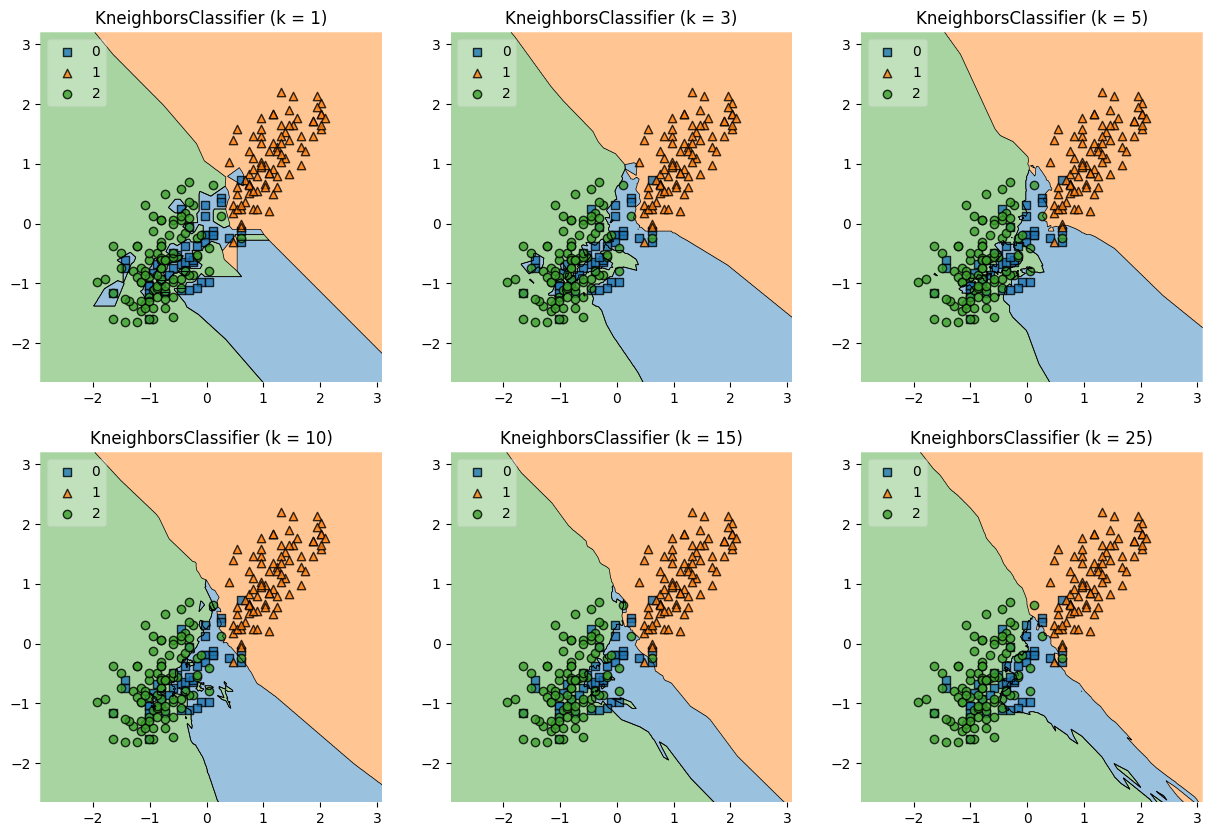

In [18]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
gs = gridspec.GridSpec(2, 3)
fig = plt.figure(figsize=(15,10))

for kNN, lab, grd in zip(l, kNNs, itertools.product(range(2), range(3))):
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X= np.array(X_train_jr), y= np.array(y_train).astype(int), clf=kNN, legend=2)
    plt.title(f'KneighborsClassifier (k = {lab})')

plt.show()

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности. Какие из результатов явно говорят о переобучении модели? Почему?

Так как для построения графика в 1.5 мы использовали обучающую выборку, то понятно, что с задачей классификации лучше всего справился алгоритм с k = 1, ведь на обучающей выборке ближайший сосед объекта - это он сам. Тем не менее, как видно из графика, такая модель является переобученной, что видно по "островкам" другого класса внутри областей классов. Также, судя по графикам, от проблемы обучения страдают алгоритмы с 3 и 5 соседями. Исходя из значений accuracy для трейна и теста, полученных в задании 1.3, становится понятно, что, во-первых, доля верных ответов для обучающей выборки уменьшается по мере роста количества ближайших соседей, и, во-вторых, алгоритмы с слишком маленькими и слишком большими k плохо выступают на трейне - accuracy сначала растет, но потом падает (тк из-за слишком большого кол-ва соседей предсказания модели начинают приближаться к случайным). Лучший из получившихся алгоритмов - тот, у которого k = 10, так как он показал наибольшую accuracy на тесте.

### Задание 2. KNN своими руками. 2,5 балла

**Задача 2.1 (2 балла)** В данном задании мы попробуем реализовать алгоритм KNN своими руками, делать мы будем KNN именно для классификации.

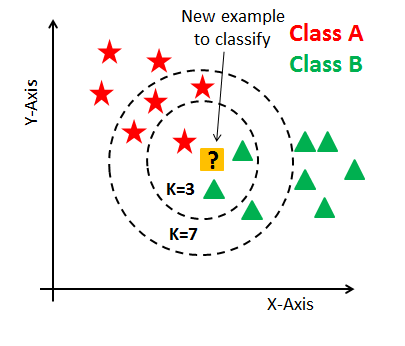

Рекомендации по реализации:
- Используйте `numpy` для представления данных в виде массивов, чтобы минимизировать преобразования.
- Избегайте циклов по всем объектам, по возможности используйте векторизированные операции.
- Обратите внимание на методы [np.linalg.norm()](https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html) и [np.argsort()](https://numpy.org/doc/stable/reference/generated/numpy.argsort.html), а также на класс `collections.Counter`.
- Особый плюс, если учтёте обработку возможных ошибок.

In [19]:
import numpy as np

class KNN:
    def __init__(self, k:int):
        self.k = k

    def fit(self, X, y):
        self.X_train = np.array(X)
        self.y_train = np.array(y)
    def predict(self, X):
        y_pred = []
        X = np.array(X).astype(float)
        for x in X:
            distances = [self.count_distance(x_train, x) for x_train in self.X_train]
            k_nn_indices = np.argsort(distances)[:self.k]
            k_nn_labels = [self.y_train[i] for i in k_nn_indices]
            label = pd.Series(k_nn_labels).mode()[0]
            y_pred.append(label)
        return np.array(y_pred).flatten()
    def count_distance(self, x, y):
        distance = np.linalg.norm(x - y)
        return distance

In [20]:
# Не меняйте файл!
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all(knn.predict(X_test) == [1, 0])

In [21]:
# Если тесты эти пройдены, то все верно!
test_knn(KNN)

**Задача 2.2 (0.5 балла)** Протестируйте ваш алгоритм на данных о пингвинах. Выведите лучший получившийся результат на тестовой выборке.

In [22]:
kNNs = [1, 3, 5, 10, 15, 25]
best_accuracy = 0
best_k = 0
for i in kNNs:
    knn = KNN(k = i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    if accuracy_score(y_test, y_pred) > best_accuracy:
        best_accuracy = accuracy_score(y_test, y_pred)
        best_k = i
print(f'Лучшее k: {best_k} с точностью {best_accuracy} на test.')

Лучшее k: 1 с точностью 0.9489795918367347 на test.


### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [23]:
data = pd.read_csv('diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.2 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их.
Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [24]:
#пропущенные значения:
data.isna().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

Пропущенных значений в наборе нет. В наборе есть столбец 'Unnamed: 0', который не содержит ничего, кроме порядкового номера бриллианта. Он нам не нужен, так как, очевидно, никак не влияет на цену бриллианта и не дает о нем никакой информации. Кроме того, в таблице у каждой строки и так есть индекс. Удалим этот столбец.

In [25]:
data = data.drop(columns = ['Unnamed: 0'])

In [26]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


**Задача 3.2 (0.2 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Постройте матрицу корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки имеют наибольшую корреляцию с целевой переменной?

In [27]:
data.corr(numeric_only = True)

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


Наибольшую корреляцию (очень сильную прямую) с целевой переменной образуют признаки carat, x, y и z. Караты определяют вес бриллианта, а остальные три столбца - его длину, ширину и глубину. Это значит, что физические габариты бриллианта в данном датасете сильнее всего влияют на его цену.

**Задача 3.3 (0.2 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные признаки методом OneHot-кодирования (`pd.get_dummies()` или `OneHotEncoder` из `sklearn`).

In [28]:
data = pd.get_dummies(data)

In [29]:
data.head()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,False,False,True,...,False,False,False,False,False,True,False,False,False,False
1,0.21,59.8,61.0,326,3.89,3.84,2.31,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,0.23,56.9,65.0,327,4.05,4.07,2.31,False,True,False,...,False,False,False,False,False,False,True,False,False,False
3,0.29,62.4,58.0,334,4.20,4.23,2.63,False,False,False,...,True,False,False,False,False,False,False,True,False,False
4,0.31,63.3,58.0,335,4.34,4.35,2.75,False,True,False,...,False,True,False,False,False,True,False,False,False,False


**Задача 3.4 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [30]:
X = data.drop(columns = ['price'])
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, shuffle = True, random_state = np.random.seed(40)) 

**Задача 3.5 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче стандартизируйте вещественные признаки в тренировочной и тестовой выборках с помощью `StandardScaler`.

Объясните, как это повлияет на интерпретацию коэффициентов линейной регрессии.

In [31]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train[['carat', 'depth', 'table', 'x', 'y', 'z']])
X_test = scaler.transform(X_test[['carat', 'depth', 'table', 'x', 'y', 'z']])

Благодаря масштабированию становится легче сравнивать силу влияния признаков на таргет, так как значения их коэффициентов стандартизируются. Но, как сказано в задании, оценки коэффициентов при этом теряют прямую интерпретацию.

**Задача 3.6 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr = LinearRegression()
lr.fit(X_train, y_train)
print(f'Ошибка на трейне: {mean_squared_error(y_train, lr.predict(X_train))}')
print(f'Ошибка на тесте: {mean_squared_error(y_test, lr.predict(X_test))}')

Ошибка на трейне: 2230021.92307017
Ошибка на тесте: 2265970.9196212944


**Задача 3.7 (0.3 балла)** Изучите [документацию](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [33]:
lr.coef_

array([ 5062.74825277,  -285.27250096,  -238.03093257, -1442.47431316,
          59.80929218,    14.46070791])

На порядок выше коэффициенты у переменных carat (вес в каратах) и x (длина бриллианта в милиметрах).

**Задача 3.8 (0.5 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом.

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией.

Обучите Lasso-регрессию и Ridge-регрессию, установив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [34]:
from sklearn.linear_model import Lasso, Ridge

lasso = Lasso(10.0).fit(X_train, y_train)
lasso.predict(X_test)
print(f"Lasso: {lasso.coef_}")
ridge = Ridge(10.0).fit(X_train, y_train)
ridge.predict(X_test)
print(f"Ridge: {ridge.coef_}")

Lasso: [4622.79501682 -246.01403645 -222.99065281 -934.12318473   -0.
   -0.        ]
Ridge: [ 5026.71603097  -282.58035791  -237.81096216 -1397.6213014
    55.65751645     8.92066978]


Веса уменьшились, но совсем немного. По-видимому, проблема мультиколлинеарности в изначальной регрессии проявлялась не сильно.

**Задача 3.9 (0.5 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов.

Какой метод сильнее снижает норму коэффициентов? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

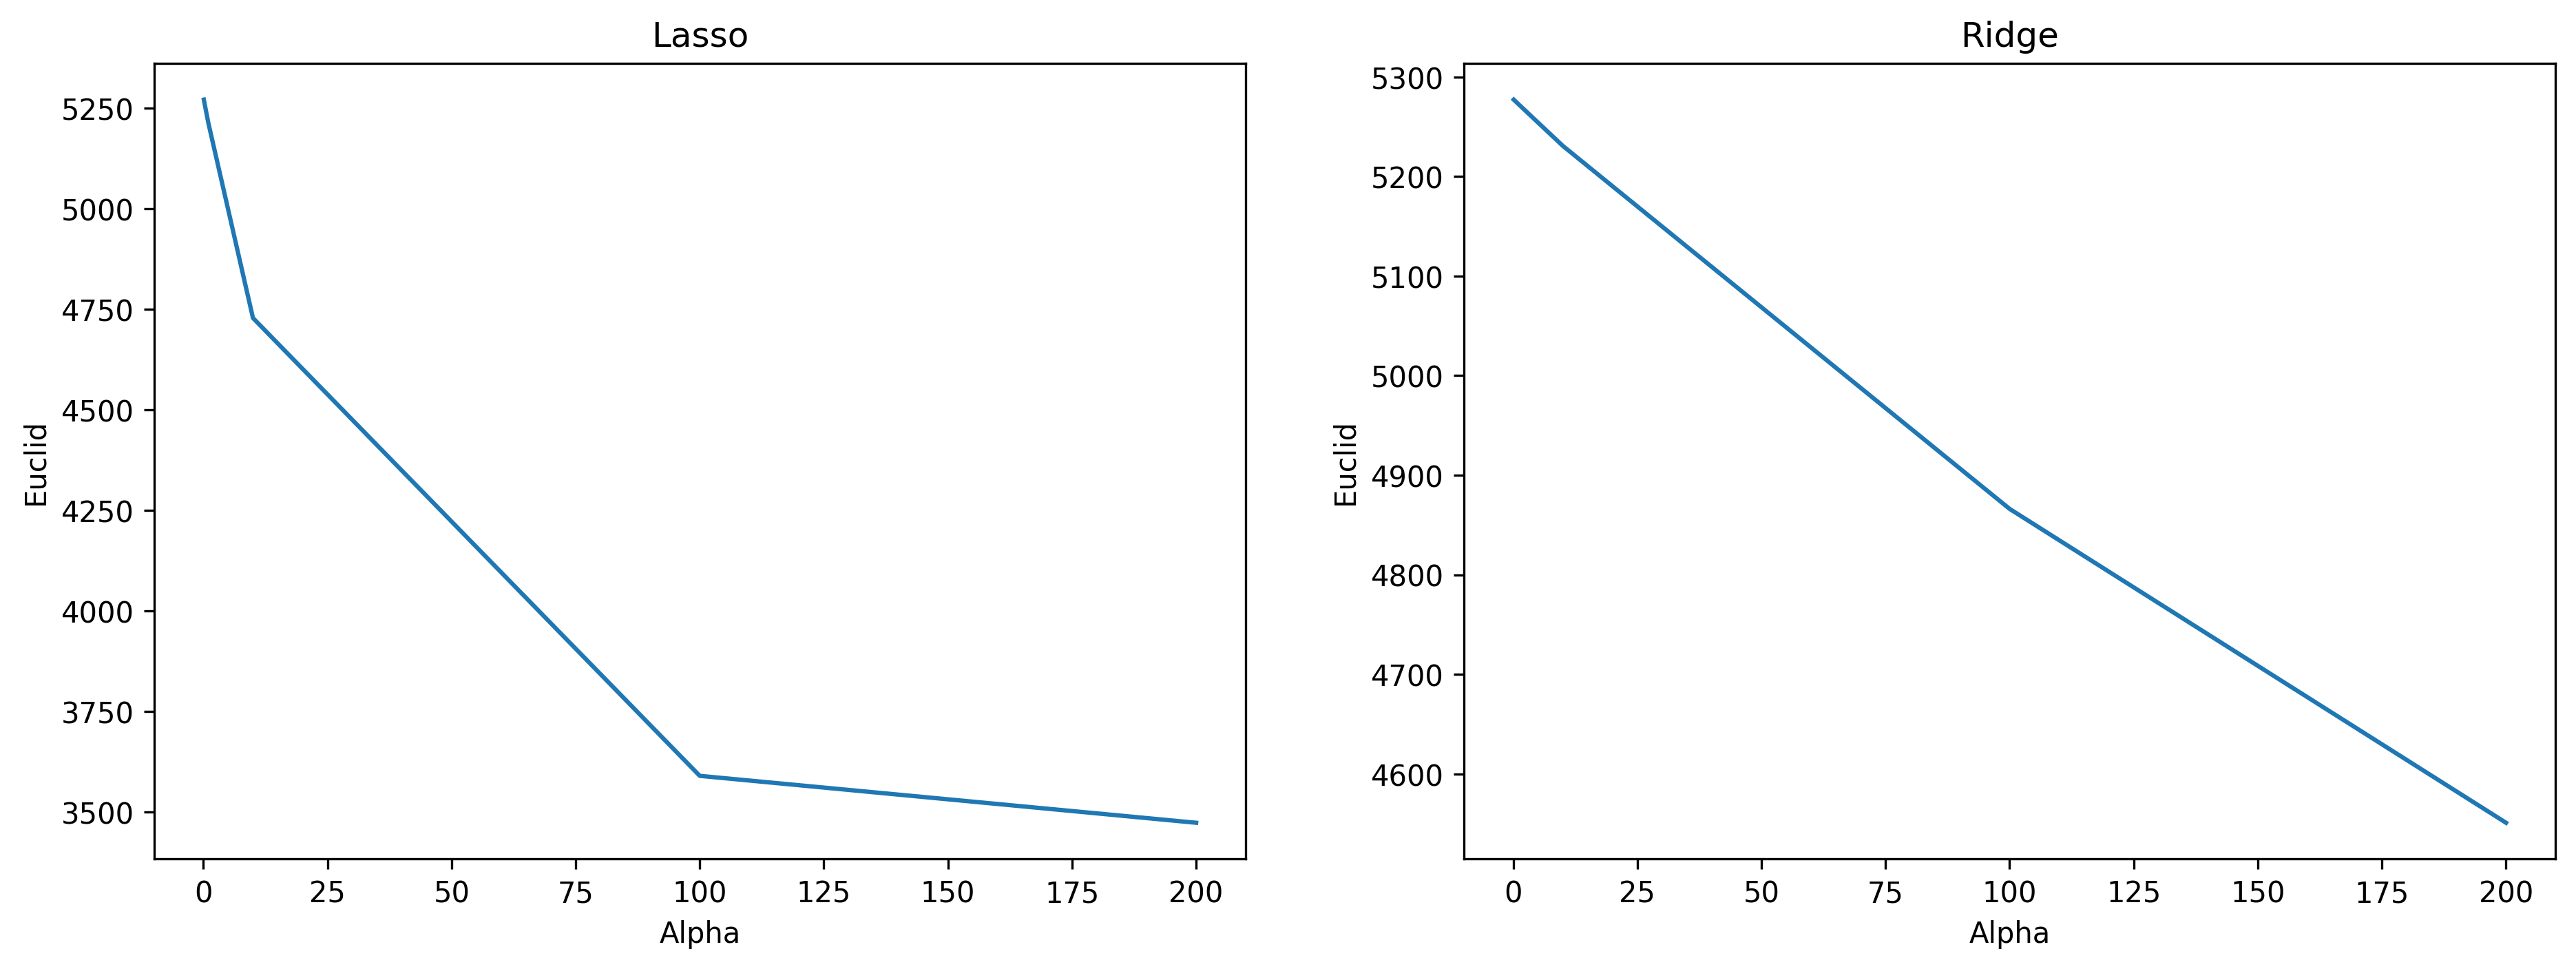

In [43]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5), dpi=300)

axs[0].set_title("Lasso")
axs[0].set_xlabel("Alpha")
axs[0].set_ylabel("Euclid")

axs[1].set_title("Ridge")
axs[1].set_xlabel("Alpha")
axs[1].set_ylabel("Euclid")

alfa = [0.1, 1, 10, 100, 200]
l1 = []
l2 = []
for a in alfa:
    lasso = Lasso(a).fit(X_train, y_train)
    lasso.predict(X_test)
    l1.append(np.linalg.norm(lasso.coef_))
    ridge = Ridge(a).fit(X_train, y_train)
    ridge.predict(X_test)   
    l2.append(np.linalg.norm(ridge.coef_))
axs[0].plot(alfa, l1)
axs[1].plot(alfa, l2)
plt.show()

Как видно из графиков, Lasso сильнее снижает норму коэффициентов по сравнению с Ridge. Lasso часто используется для отбора признаков, так как она вычисляет абсолютные значения (модули), и поэтому может "обнулять" часть признаков - таким образом, она помогает отобрать признаки, которые сильно влияют на таргет (достаточно, чтобы не "обнулиться"), игнорируя менее значимые.

**Задача 3.10 (0.5 балла)**
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке.

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`.

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество.

In [36]:
from sklearn.linear_model import LassoCV
lasso_CV = LassoCV(alphas = [0.1, 1, 10, 100, 200], cv = 5)
lasso_CV.fit(X_train, y_train)
lasso_CV.predict(X_test)   

array([  352.3250823 ,   851.45297988,   183.44225117, ...,
        5962.4838889 , 16105.7657251 ,   179.99082225])

In [37]:
lasso_CV.alphas_

array([2.e+02, 1.e+02, 1.e+01, 1.e+00, 1.e-01])

In [38]:
lasso_CV.mse_path_

array([[2381530.98530345, 2533132.18756359, 2394990.91281967,
        2409849.90435096, 2434591.37383239],
       [2311702.37416954, 2477471.82937757, 2328621.50502118,
        2334582.73989873, 2374696.80529865],
       [2165406.044748  , 2384542.63542824, 2195544.9029762 ,
        2195394.99691204, 2267805.50021489],
       [2146615.82964263, 2387655.94136358, 2176340.19714584,
        2191572.15119982, 2273077.76152123],
       [2145554.98128429, 2391567.11834373, 2175157.36090021,
        2203023.8183983 , 2274411.82965129]])

In [39]:
np.mean(lasso_CV.mse_path_, axis = 1)

array([2430819.07277401, 2365415.05075313, 2241738.81605587,
       2235052.37617462, 2237943.02171556])

Таким образом, наибольшее качество дает значение $\alpha$, равное 1.

**Задача 3.11 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [40]:
lasso = Lasso(1)
lasso.fit(X_train, y_train)

Lasso(alpha=1)

In [41]:
lasso.coef_

array([ 5019.36225818,  -280.02015322,  -236.7932615 , -1360.18121621,
          33.70207637,    -0.        ])

Таким образом, неинформативными оказались признаки y и z, отвечающие за ширину и глубину бриллианта соответственно, а наиболее информативными - carat (вес в каратах) и x (длина бриллианта в милиметрах). Я думаю, что переменная веса в каратах обладает таким большим весом, так как это основная мера ценности бриллианта.\
Возможно, x весит так много, при том что y и z весят так мало, из-за проблемы мультиколлинеарности. По идее, x, y и z должны сильно влиять на таргет, так как тоже касаются габаритов бриллианта и определяют его ценность. С x это сработало, но с y и z нет. Посмотрим на переменную depth (общая глубина в процентах) - она считается по формуле, в которую входят x и y. Вероятно, эти переменные сильно коррелируют с depth, и поэтому весят так мало.

**Задача 3.12 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [42]:
lasso.predict(X_test)
print(f'Ошибка обычной регрессии на тесте: {mean_squared_error(y_test, lr.predict(X_test))}')
print(f'Ошибка Лассо на тесте: {mean_squared_error(y_test, lasso.predict(X_test))}')

Ошибка обычной регрессии на тесте: 2265970.9196212944
Ошибка Лассо на тесте: 2266321.0784232


Хотя разница совсем небольшая, чуть меньшую ошибку все же имеет обычная регрессия, и лучше использовать именно ее. Обычный линрег мог оказаться лучше Лассо, так как Лассо могло "обнулить" какие-то признаки - как раз есть и положительные, и отрицательные веса, а какие-то еще и очень маленькие.